In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pokemon_stats.mat_utils as mat
import pokemon_stats.viz as viz

%load_ext autoreload
%autoreload 2

In [3]:
# read data
df = mat.importdf('dual_dual_type_chart_from_single', 2)
df

first_type             Normal Fire Water Electric Grass  Ice Fighting Poison  \
second_type            Normal Fire Water Electric Grass  Ice Fighting Poison   
first_type second_type                                                         
Normal     Normal         1.0  1.0   1.0      1.0   1.0  1.0      1.0    1.0   
Fire       Fire           1.0  0.5   0.5      1.0   2.0  2.0      1.0    1.0   
Water      Water          1.0  2.0   0.5      1.0   0.5  1.0      1.0    1.0   
Electric   Electric       1.0  1.0   2.0      0.5   0.5  1.0      1.0    1.0   
Grass      Grass          1.0  0.5   2.0      1.0   0.5  1.0      1.0    0.5   
...                       ...  ...   ...      ...   ...  ...      ...    ...   
Dragon     Steel          1.0  1.0   1.0      1.0   1.0  2.0      1.0    1.0   
           Fairy          1.0  1.0   1.0      1.0   1.0  1.0      2.0    1.0   
Dark       Steel          1.0  1.0   1.0      1.0   1.0  2.0      1.0    1.0   
           Fairy          1.0  1.0   1.0      1.0   1.0  1.0      2.0    1.0   
Steel      Fairy          1.0  0.5   1.0      1.0   1.0  2.0      2.0    1.0   

first_type             Ground Flying  ...  Ghost                  Dragon  \
second_type            Ground Flying  ... Dragon Dark Steel Fairy   Dark   
first_type second_type                ...                                  
Normal     Normal         1.0    1.0  ...    0.0  0.0   0.0   0.0    1.0   
Fire       Fire           1.0    1.0  ...    0.5  1.0   2.0   1.0    0.5   
Water      Water          2.0    1.0  ...    0.5  1.0   1.0   1.0    0.5   
Electric   Electric       0.0    2.0  ...    0.5  1.0   1.0   1.0    0.5   
Grass      Grass          2.0    0.5  ...    0.5  1.0   0.5   1.0    0.5   
...                       ...    ...  ...    ...  ...   ...   ...    ...   
Dragon     Steel          1.0    1.0  ...    2.0  1.0   0.5   2.0    2.0   
           Fairy          1.0    1.0  ...    2.0  2.0   0.5   1.0    4.0   
Dark       Steel          1.0    1.0  ...    2.0  1.0   2.0   2.0    1.0   
           Fairy          1.0    1.0  ...    2.0  2.0   2.0   1.0    4.0   
Steel      Fairy          1.0    1.0  ...    2.0  2.0   0.5   2.0    4.0   

first_type                          Dark       Steel  
second_type            Steel Fairy Steel Fairy Fairy  
first_type second_type                                
Normal     Normal       0.50   1.0   0.5   1.0   0.5  
Fire       Fire         1.00   0.5   2.0   1.0   2.0  
Water      Water        0.50   0.5   1.0   1.0   1.0  
Electric   Electric     0.50   0.5   1.0   1.0   1.0  
Grass      Grass        0.25   0.5   0.5   1.0   0.5  
...                      ...   ...   ...   ...   ...  
Dragon     Steel        1.00   2.0   0.5   2.0   1.0  
           Fairy        1.00   2.0   1.0   2.0   0.5  
Dark       Steel        1.00   2.0   0.5   2.0   1.0  
           Fairy        1.00   2.0   1.0   2.0   0.5  
Steel      Fairy        1.00   2.0   1.0   2.0   1.0  

[171 rows x 171 columns]

# Heat Maps

<Figure size 1200x1000 with 0 Axes>

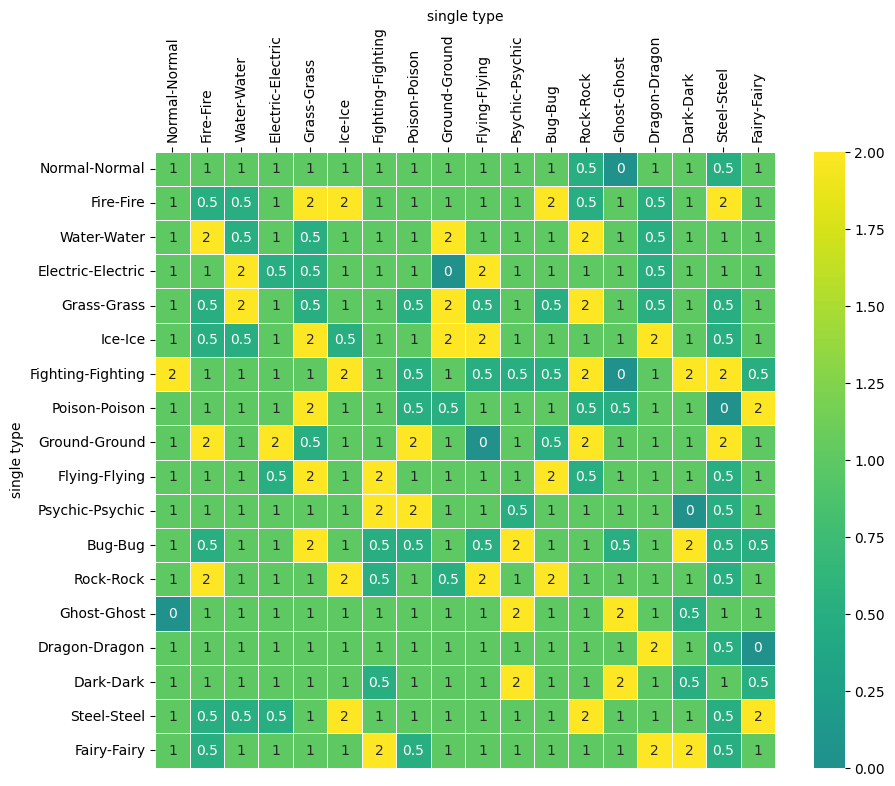

In [5]:
# Create the vanilla heatmap
ntypes = 18
df2 = df.iloc[0:ntypes, 0:ntypes]
# single_types_index = [(ntypes+1)*i - i*(i+1)/2 for i in range(ntypes)] 
# df2 = df.iloc[single_types_index, single_types_index]

import importlib
importlib.reload(viz)
plt.figure(figsize=(12, 10)) # Adjust figure size as needed
viz.heatmap(df2, 'single type', 'single type') 

# lets calculate the total damage dealt and taken

In [6]:
dfin = mat.calculate_row_statistics(df)
dfin

AttributeError: module 'pokemon_stats.mat_utils' has no attribute 'calculate_row_statistics'

# barchart visualization

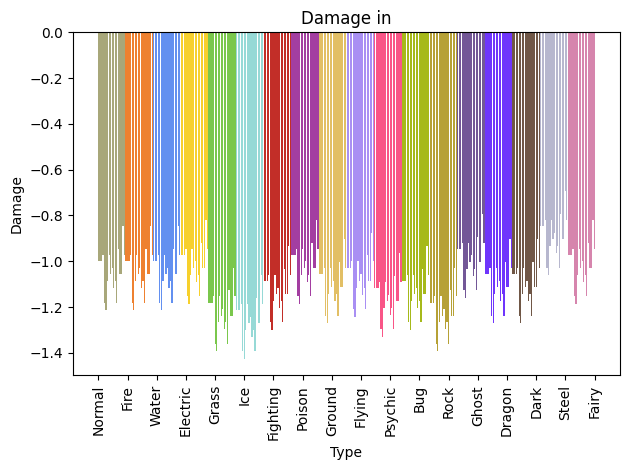

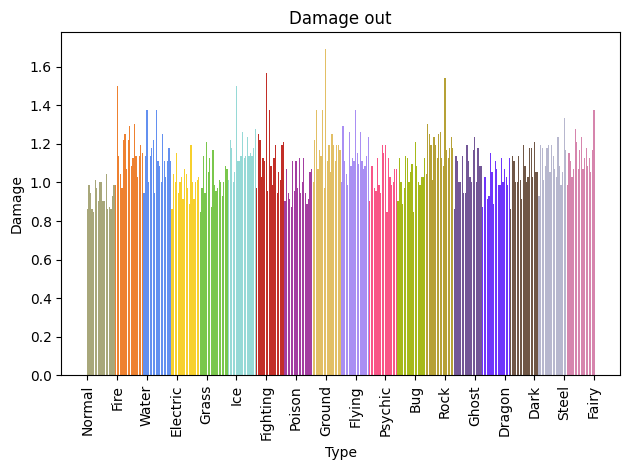

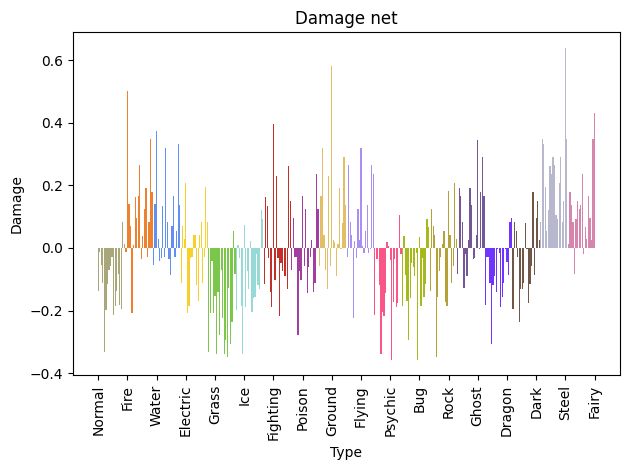

In [139]:
labels = ['in', 'out', 'net']
tick_positions = [(num_colors+1)*i for i in range(num_colors)]
tick_labels = colors_key

for i,l in enumerate(labels):
    means = df2[ l + '_avg' ]
    stds = df2[ l + '_std' ]

    colors = [colors_hex[(i // 18) % num_colors] for i in range(len(means))]
    # colors = ['lightskyblue' if val >= 0 else 'salmon' for val in means]
    plt.bar(df2.index, means, capsize=5, color=colors) # ,yerr=stds)
    plt.xlabel('Type')
    plt.ylabel('Damage')
    plt.title('Damage ' + l )
    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=90, fontsize=10)
    # Hide the x-axis labels
    # plt.xticks([])
    plt.tight_layout()
    plt.show()


# damage taken

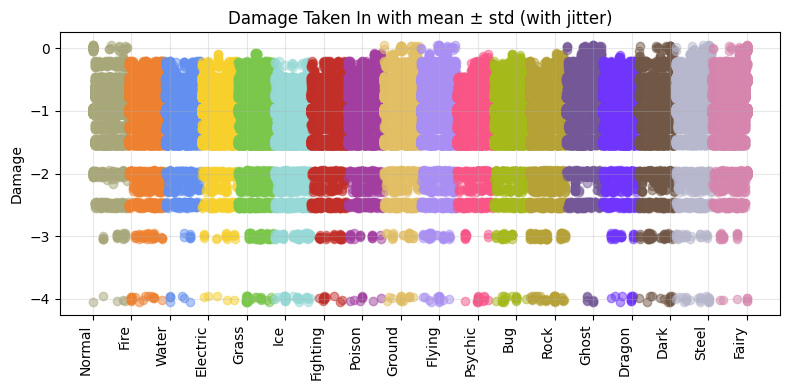

In [140]:
x_positions = np.arange(len(df))

fig, ax = plt.subplots(figsize=(8, 4))
for i, (idx, row) in enumerate(df.iterrows()):
    # mean = -row.mean()
    # std = row.std()
    # ax.errorbar(i, mean, yerr=std, fmt='o', color='black', capsize=4, lw=1.5, alpha=0.5)
    
    # Add small jitter in both x and y directions
    x = np.full(len(row), i) + np.random.uniform(-0.15, 0.15, size=len(row))
    y = -row.values + np.random.uniform(-0.05, 0.05, size=len(row))  # vertical jitter
    # Assign colors based on type
    # print(row.name)
    color = type_colors.get(row.name.split('/')[0], '#777777')
    ax.scatter(x, y, alpha=0.5, color=color)
    
# Formatting
tick_positions = [(num_colors+1)*i for i in range(num_colors)]
tick_labels = colors_key
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels,rotation=90, ha='right')
ax.set_title("Damage Taken In with mean ± std (with jitter)")
ax.set_ylabel("Damage")
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# damage given

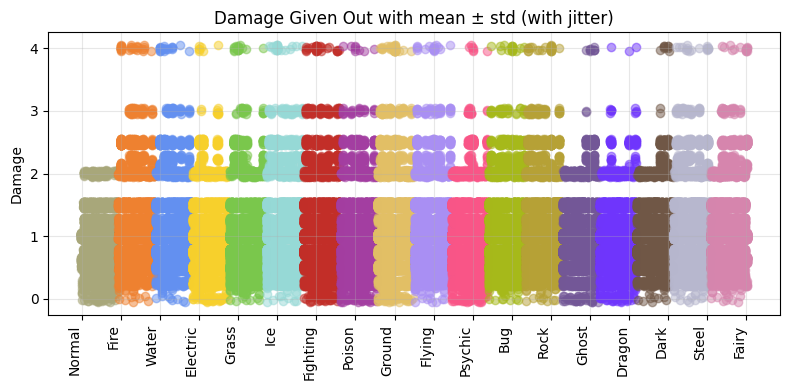

In [141]:
fig, ax = plt.subplots(figsize=(8, 4))
x_positions = np.arange(len(df.columns))

for i, (col, values) in enumerate(df.items()):

    # Mean and std for this column
    # mean = values.mean()
    # std = values.std()
    # ax.errorbar(i, mean, yerr=std, fmt='o', color='black', capsize=4, lw=1.5, alpha=0.5)
    
    # Add jitter in both directions
    x = np.full(len(values), i) + np.random.uniform(-0.15, 0.15, size=len(values))
    y = values + np.random.uniform(-0.05, 0.05, size=len(values))  
    color = type_colors.get(col.split('/')[0], '#777777')
    ax.scatter(x, y, alpha=0.5, color=color)

tick_positions = [(num_colors+1)*i for i in range(num_colors)]
tick_labels = colors_key
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels,rotation=90, ha='right')
ax.set_title("Damage Given Out with mean ± std (with jitter)")
ax.set_ylabel("Damage")
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# look at the matrix minus transpose

In [142]:
# by doing this we are comparing how much does A damage B vs B damage A. only relative damage
df3 = df - df.T
df3.index.name = 'defense\\attack'
df3

,Normal/Normal,Normal/Fire,Normal/Water,Normal/Electric,Normal/Grass,Normal/Ice,Normal/Fighting,Normal/Poison,Normal/Ground,Normal/Flying,...,Fairy/Ground,Fairy/Flying,Fairy/Psychic,Fairy/Bug,Fairy/Rock,Fairy/Ghost,Fairy/Dragon,Fairy/Dark,Fairy/Steel,Fairy/Fairy
defense\attack,,,,,,,,,,,,,,,,,,,,,
Normal/Normal,0.000,0.000,0.00,0.00,0.000,0.000,1.00,0.000,0.00,0.000,...,0.00,0.000,0.000,0.000,0.375,-0.50,0.000,0.00,0.375,0.000
Normal/Fire,0.000,0.000,0.75,0.00,-0.750,-0.750,0.50,0.000,0.50,0.000,...,0.00,-0.250,-0.250,-0.875,0.375,-0.25,0.000,-0.25,-0.375,-0.375
Normal/Water,0.000,-0.750,0.00,0.50,0.750,-0.250,0.50,0.000,-0.50,0.000,...,-0.50,0.000,0.000,0.000,0.000,0.00,0.250,0.00,0.000,0.000
Normal/Electric,0.000,0.000,-0.50,0.00,0.250,0.000,0.50,0.000,1.00,-0.750,...,1.00,-0.750,0.000,0.000,0.250,0.00,0.250,0.00,0.000,0.000
Normal/Grass,0.000,0.750,-0.75,-0.25,0.000,0.500,0.50,0.750,-0.75,0.750,...,-0.75,0.750,0.000,0.750,0.000,0.00,0.250,0.00,0.375,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fairy/Ghost,0.500,0.250,0.00,0.00,0.000,0.000,-0.75,0.750,0.00,0.000,...,0.00,0.000,-0.500,-0.500,0.000,0.00,-1.000,0.25,0.750,0.000
Fairy/Dragon,0.000,0.000,-0.25,-0.25,-0.250,0.500,-0.75,0.750,0.00,0.000,...,1.00,1.000,1.000,0.750,1.000,1.00,0.000,0.25,1.875,2.500
Fairy/Dark,0.000,0.250,0.00,0.00,0.000,0.000,0.25,0.750,0.00,0.000,...,0.75,0.750,-0.750,1.500,0.750,-0.25,-0.250,0.00,1.500,2.000


# Calculate the net damage and sort by it

In [144]:
# Compute column means and get the sorted order
df3['net_damage'] = df3.mean(axis=0)
df3 = df3.sort_values(by='net_damage', ascending=False)
df3

,Normal/Normal,Normal/Fire,Normal/Water,Normal/Electric,Normal/Grass,Normal/Ice,Normal/Fighting,Normal/Poison,Normal/Ground,Normal/Flying,...,Fairy/Flying,Fairy/Psychic,Fairy/Bug,Fairy/Rock,Fairy/Ghost,Fairy/Dragon,Fairy/Dark,Fairy/Steel,Fairy/Fairy,net_damage
defense\attack,,,,,,,,,,,,,,,,,,,,,
Steel/Steel,-0.750,0.375,-0.125,-0.125,-0.750,-2.25,0.00,-1.000,0.00,-0.750,...,-2.25,-2.25,-2.250,-3.750,-2.000,-2.250,-2.000,-1.875,-3.75,0.638889
Ground/Ground,0.000,-1.500,1.000,-2.500,1.375,1.00,0.00,-2.000,0.00,0.500,...,0.50,0.00,0.375,-2.000,0.000,0.000,0.000,-1.500,0.00,0.580247
Fire/Fire,0.000,-0.125,1.375,0.000,-2.000,-2.00,0.00,0.000,1.00,0.000,...,-0.50,-0.50,-2.250,0.375,-0.500,-0.125,-0.500,-2.250,-0.75,0.500000
Fairy/Fairy,0.000,0.375,0.000,0.000,0.000,0.00,-2.00,1.375,0.00,0.000,...,0.00,0.00,-0.500,0.000,0.000,-2.500,-2.000,1.375,0.00,0.429784
Fighting/Fighting,-3.000,-1.500,-1.500,-1.500,-1.500,-3.00,-1.50,-1.125,-1.50,-0.125,...,3.75,3.75,0.750,-1.125,1.875,1.375,-1.125,-0.125,3.75,0.395833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Psychic/Grass,0.000,0.750,-0.750,-0.250,0.000,0.50,-0.75,0.500,-0.75,0.750,...,0.75,0.00,1.250,-0.500,0.500,0.250,1.000,0.375,0.00,-0.339506
Rock/Grass,-0.375,0.125,-0.750,-0.500,0.000,-0.25,0.25,0.375,-0.25,0.125,...,0.25,0.00,0.500,-0.500,0.000,0.250,0.000,0.875,0.00,-0.347222
Grass/Rock,-0.375,0.125,-0.750,-0.500,0.000,-0.25,0.25,0.375,-0.25,0.125,...,0.25,0.00,0.500,-0.500,0.000,0.250,0.000,0.875,0.00,-0.347222


# slice the df at the top row and matching columns

In [145]:
top_select = 25
# Select top 100 rows dual types (highest mean)
types_to_keep = list(df3.index)[:top_select]
# keep the columns with matching names
df4 = df3.loc[types_to_keep, types_to_keep + ['net_damage']]
df4

,Steel/Steel,Ground/Ground,Fire/Fire,Fairy/Fairy,Fighting/Fighting,Water/Water,Fire/Steel,Steel/Fire,Fairy/Steel,Steel/Fairy,...,Steel/Ground,Ghost/Steel,Steel/Ghost,Ground/Steel,Flying/Fire,Flying/Steel,Fire/Flying,Steel/Flying,Steel/Fighting,net_damage
defense\attack,,,,,,,,,,,,,,,,,,,,,
Steel/Steel,0.000,3.0,3.750,-3.750,3.000,0.750,0.750,0.750,-1.875,-1.875,...,0.375,-0.125,-0.125,0.375,0.375,-0.375,0.375,-0.375,0.375,0.638889
Ground/Ground,-3.000,0.0,-3.000,0.000,0.000,3.000,-3.000,-3.000,-1.500,-1.500,...,-1.500,-1.500,-1.500,-1.500,-1.000,-1.000,-1.000,-1.000,-1.500,0.580247
Fire/Fire,-3.750,3.0,0.000,-0.750,0.000,3.750,-1.875,-1.875,-2.250,-2.250,...,-1.500,-2.000,-2.000,-1.500,-0.125,-2.000,-0.125,-2.000,-2.000,0.500000
Fairy/Fairy,3.750,0.0,0.750,0.000,-3.750,0.000,1.750,1.750,1.375,1.375,...,1.375,1.375,1.375,1.375,0.375,1.375,0.375,1.375,-1.125,0.429784
Fighting/Fighting,-3.000,0.0,0.000,3.750,0.000,0.000,-1.500,-1.500,-0.125,-0.125,...,-1.500,-1.000,-1.000,-1.500,1.375,-0.125,1.375,-0.125,-1.500,0.395833
Water/Water,-0.750,-3.0,-3.750,0.000,0.000,0.000,-2.250,-2.250,-0.500,-0.500,...,-2.000,-0.500,-0.500,-2.000,-2.000,-0.500,-2.000,-0.500,-0.500,0.375000
Fire/Steel,-0.750,3.0,1.875,-1.750,1.500,2.250,0.000,0.000,-1.250,-1.250,...,0.000,-0.500,-0.500,0.000,0.125,-0.625,0.125,-0.625,-0.250,0.347222
Steel/Fire,-0.750,3.0,1.875,-1.750,1.500,2.250,0.000,0.000,-1.250,-1.250,...,0.000,-0.500,-0.500,0.000,0.125,-0.625,0.125,-0.625,-0.250,0.347222
Fairy/Steel,1.875,1.5,2.250,-1.375,0.125,0.500,1.250,1.250,0.000,0.000,...,0.875,0.625,0.625,0.875,0.375,0.500,0.375,0.500,-0.125,0.346836


# now visualize it

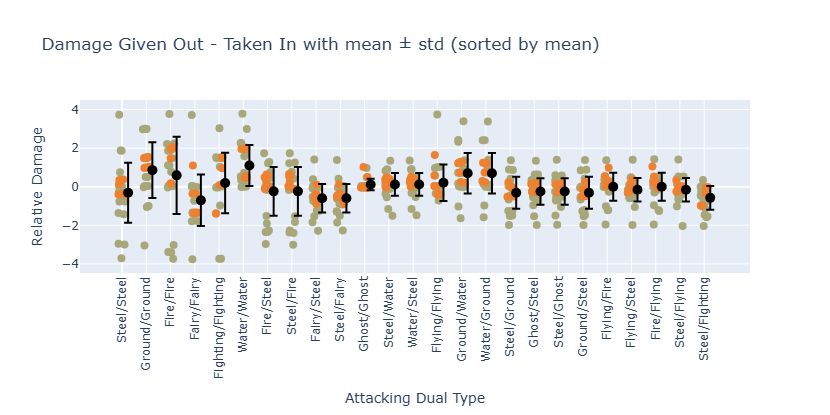

In [148]:
fig = go.Figure()
offset = 0.25  # shift centroids
 
for i,col in enumerate(types_to_keep):
    values = df4[col]
    
    # Jittered scatter positions
    x = np.full(len(values), i) + np.random.uniform(-0.15, 0.15, size=len(values))
    y = values + np.random.uniform(-0.05, 0.05, size=len(values))

    colors = [type_colors.get(t.split('/')[0], '#777777') for t in df2.index]  
    
    """
    # Color points by sign with transparency
    colors = [
    'rgba(255,128,114,0.5)' if val < 0 else
    'rgba(128,0,128,0.5)' if val == 0 else
    'rgba(135,206,235,0.5)' 
    for val in values
]
    """
    
    # Scatter points (hover shows only row label)
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers',
        marker=dict(color=colors, size=8),
        text=df3.index,
        hovertemplate='%{text}<extra></extra>',
        showlegend=False
    ))

    # Mean ± std markers (shifted)
    mean = values.mean()
    std = values.std()
    fig.add_trace(go.Scatter(
        x=[i + offset],
        y=[mean],
        mode='markers',
        marker=dict(color='black', size=10),
        error_y=dict(type='data', array=[std], visible=True),
        # hoverinfo='skip',
        hovertemplate=f'Mean ± Std:<br>{mean:.2f} ± {std:.2f}<extra></extra>',
        showlegend=False
    ))

# Ensure x-axis, ticks, and labels all match the sorted order
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=np.arange(len(types_to_keep)),
        ticktext=types_to_keep,
        tickangle=-90,
        # showticklabels=False,  # <-- hide the tick labels
        # showgrid=False,        # optional: hide vertical gridlines
        # ticks=''               # optional: remove tick marks
    ),
    yaxis_title="Relative Damage",
    xaxis_title='Attacking Dual Type',
    title="Damage Given Out - Taken In with mean ± std (sorted by mean)",
    width=900,
    height=400,
    showlegend=False
)

fig.show()

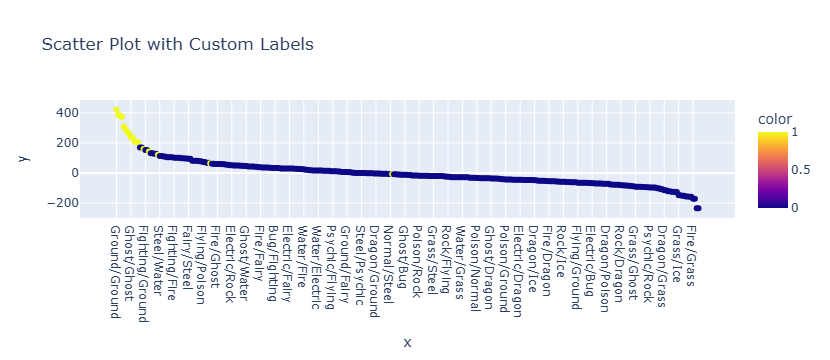

In [66]:
s = difference_total.sort_values(ascending=False)

# Identify matching pairs
is_matching = [1 if (idx.split('/')[0] == idx.split('/')[1]) else 0 for idx in s.index]

fig = px.scatter( x = s.index, y = s.values,
                  color=is_matching,  # color points by match flag
                color_discrete_map={0: 'black', 1: 'red'},  # customize colors
                labels={"X_Data": "Dual Types",
                         "Y_Data": "New Damage"},
                 title="Scatter Plot with Custom Labels"
) 
fig.update_traces(hovertemplate="Index: %{x}<br>Dual Type: %{y}")
fig.show()

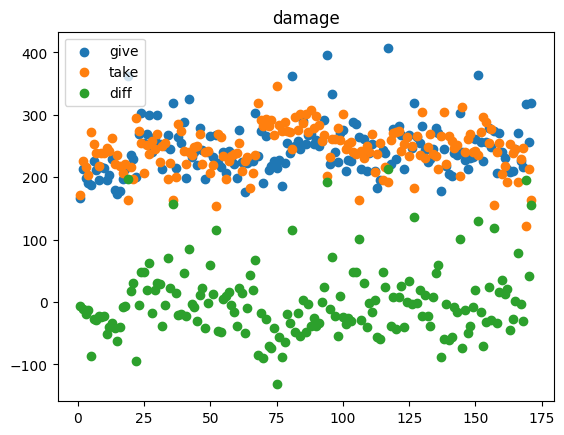

In [70]:

plt.scatter(ind, col_total, label='give')
plt.scatter(ind, row_total, label='take')
plt.scatter(ind, difference_total, label='diff')
plt.legend()
plt.title('damage')
plt.show()

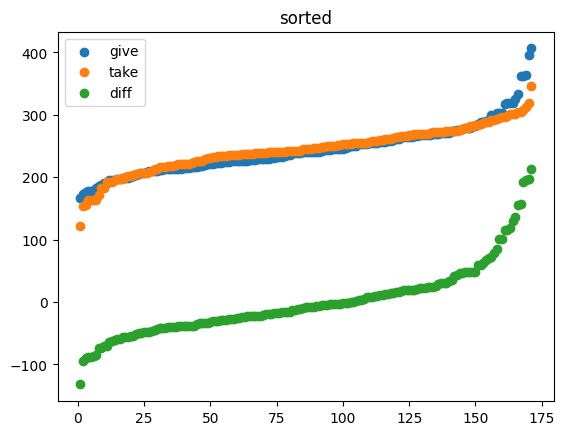

In [71]:

plt.scatter(ind, damage_given, label='give')
plt.scatter(ind, damage_taken, label='take')
plt.scatter(ind, give_minus_take, label='diff')
plt.legend()
plt.title('sorted')
plt.show()